## 卷积层和池化层的计算过程
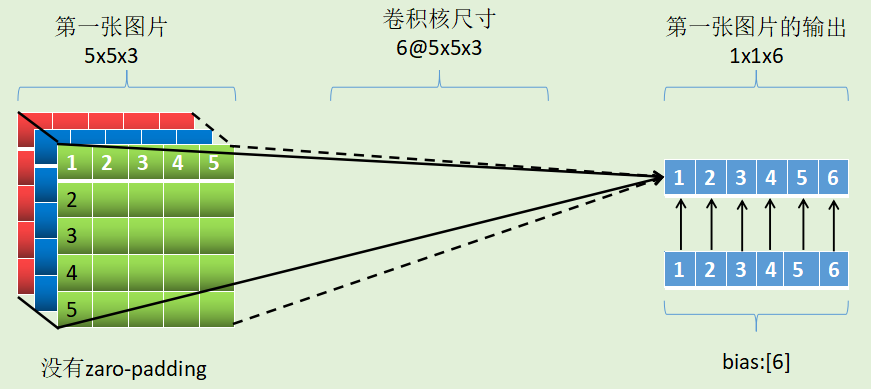

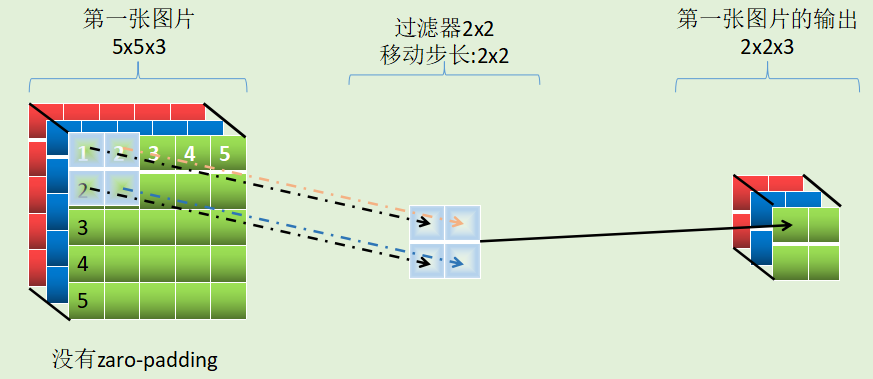

#### 1. 假设我们输入矩阵

In [1]:
import tensorflow as tf
import numpy as np

# 构建5*5*3的数据
#M = np.array([        
#        [[1],[-1],[0]],
#        [[-1],[2],[1]],
#        [[0],[2],[-2]]])
M = np.random.randint(-10, 10, size=[5, 5, 3])

print("Matrix shape is: ",M.shape)

Matrix shape is:  (5, 5, 3)


#### 2. 定义卷积过滤器, 深度为6。

In [2]:
# 通过tf.get_variable()函数创建卷积过滤器
# 这里申明的参数变量的为四维张量，前两个参数表示过滤器尺寸，第三个维度表示输入层的深度，第四个参数表示过滤器的深度
filter_weight = tf.get_variable('weights', 
                                shape=[5, 5, 3, 6], 
                                initializer = tf.truncated_normal_initializer(stddev=0.1))
# 设置偏置项
biases = tf.get_variable('biases', shape=[6], initializer = tf.constant_initializer(0.1))

#### 3. 调整输入的格式符合TensorFlow的要求。

In [3]:
M = np.asarray(M, dtype='float32')
M = M.reshape(1, 5, 5, 3)

#### 4.  计算矩阵通过卷积层过滤器和池化层过滤器计算后的结果。

In [4]:
# 构建输入节点
# [1, None, None, None]：第一个维度：表示batch的大小；后面三个维度：表示图片尺寸的大小
x = tf.placeholder('float32', [1, None, None, None])

# 构建卷积层
# tf.nn.conv2d提供了一个非常方便的函数来实现卷积层前向传播算法。
# 第一个参数：为当前层的节点矩阵。注意这个节点矩阵是一个四维矩阵，后面三维对应一个节点矩阵，第一维对应一个输入batch
# 比如：input[0, :, :, :]表示第一张图片；input[1, :, :, :]表示第二张图片；后续以此类推
# 第二个参数提供了卷积层的权重，
# 第三个参数为不同维度上的步长,虽然第三个参数提供的是一个长度为4的数组，但是第一维和最后一维的数字一定是1.这是因为卷积的步长只对矩阵的长宽有效
# 最后一个参数是填充(padding)的方法，TensorFlow中提供SAME或者VALID两种选择。其中SAME表示添加全0填充，VALID表示不添加
conv = tf.nn.conv2d(x, filter_weight, strides = [1, 2, 2, 1], padding = 'VALID')

# tf.nn.bias_add提供了一个方便的函数给每一个节点加上偏置项。
# 注意这里不能直接使用加法
# 因为矩阵上不同位置的节点上都需要加上同样的偏置项
layer = tf.nn.bias_add(conv, biases)

# 构建池化层
# tf.nn.max_pool实现了最大池化层的前向传播。
# ksize：提供了过滤器的尺寸，四维矩阵，第一个参数与最后一个参数必须为1
# strides：提供了步长信息，四维矩阵，第一个参数和最后一个参数必须为1，常见池化层过滤器尺寸为[1,2,2,1]或者[1,3,3,1]
# padding：提供了是否使用全零填充
# tf.nn.avg_pool实现了平均池化。参数与tf.nn.max_pool()函数一样
pool = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

# 建立会话
with tf.Session() as sess:
    # 变量初始化
    tf.global_variables_initializer().run()
    
    # 计算卷积层
    convoluted_M = sess.run(layer, feed_dict={x:M})
    
    # 计算池化层
    pooled_M = sess.run(pool,feed_dict={x:M})
    
    # 打印结果
    print("convoluted_M.shape: \n", convoluted_M.shape)
    print("convoluted_M: \n", convoluted_M)
    print("pooled_M: \n", pooled_M.shape)
    print("pooled_M: \n", pooled_M)
    
    

InternalError: Blas SGEMM launch failed : m=1, n=6, k=75
	 [[Node: Conv2D = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], padding="VALID", strides=[1, 2, 2, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](_arg_Placeholder_0_0/_1, weights/read)]]
	 [[Node: BiasAdd/_3 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_12_BiasAdd", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'Conv2D', defined at:
  File "D:\Program Files (x86)\Anaconda3\envs\tensorflow\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "D:\Program Files (x86)\Anaconda3\envs\tensorflow\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "D:\Program Files (x86)\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "D:\Program Files (x86)\Anaconda3\envs\tensorflow\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "D:\Program Files (x86)\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "D:\Program Files (x86)\Anaconda3\envs\tensorflow\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "D:\Program Files (x86)\Anaconda3\envs\tensorflow\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "D:\Program Files (x86)\Anaconda3\envs\tensorflow\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "D:\Program Files (x86)\Anaconda3\envs\tensorflow\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "D:\Program Files (x86)\Anaconda3\envs\tensorflow\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "D:\Program Files (x86)\Anaconda3\envs\tensorflow\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "D:\Program Files (x86)\Anaconda3\envs\tensorflow\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "D:\Program Files (x86)\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "D:\Program Files (x86)\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "D:\Program Files (x86)\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "D:\Program Files (x86)\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "D:\Program Files (x86)\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "D:\Program Files (x86)\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "D:\Program Files (x86)\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "D:\Program Files (x86)\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-e65a99f840d1>", line 12, in <module>
    conv = tf.nn.conv2d(x, filter_weight, strides = [1, 2, 2, 1], padding = 'VALID')
  File "D:\Program Files (x86)\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 725, in conv2d
    data_format=data_format, dilations=dilations, name=name)
  File "D:\Program Files (x86)\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "D:\Program Files (x86)\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\ops.py", line 3160, in create_op
    op_def=op_def)
  File "D:\Program Files (x86)\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\ops.py", line 1625, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InternalError (see above for traceback): Blas SGEMM launch failed : m=1, n=6, k=75
	 [[Node: Conv2D = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], padding="VALID", strides=[1, 2, 2, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](_arg_Placeholder_0_0/_1, weights/read)]]
	 [[Node: BiasAdd/_3 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_12_BiasAdd", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
